In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.applications import VGG16
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

In [2]:
num_classes = 10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

170498071/170498071 [==============================] - 15s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
VGG_conv = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
VGG_conv.trainable = False
VGG_conv.summary()

58889256/58889256 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                              

In [5]:
model = models.Sequential()

model.add(VGG_conv)
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 1024)              525312    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                10250     
                                                                 
Total params: 15,250,250
Trainable params: 535,562
Non-trainable params: 14,714,688
_________________________________________________________________


In [6]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002), metrics=['acc'])

In [7]:
history = model.fit(x_train, y_train, batch_size=256, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
196/196 [==============================] - 17s 43ms/step - loss: 9.2532 - acc: 0.3640 - val_loss: 2.9742 - val_acc: 0.5415
Epoch 2/100
196/196 [==============================] - 7s 37ms/step - loss: 3.7017 - acc: 0.4536 - val_loss: 1.8817 - val_acc: 0.5455
Epoch 3/100
196/196 [==============================] - 7s 38ms/step - loss: 2.2286 - acc: 0.4789 - val_loss: 1.5386 - val_acc: 0.5476
Epoch 4/100
196/196 [==============================] - 7s 38ms/step - loss: 1.7321 - acc: 0.5026 - val_loss: 1.4046 - val_acc: 0.5595
Epoch 5/100
196/196 [==============================] - 7s 37ms/step - loss: 1.5073 - acc: 0.5300 - val_loss: 1.3391 - val_acc: 0.5677
Epoch 6/100
196/196 [==============================] - 7s 38ms/step - loss: 1.3643 - acc: 0.5566 - val_loss: 1.3000 - val_acc: 0.5812
Epoch 7/100
196/196 [==============================] - 7s 38ms/step - loss: 1.2729 - acc: 0.5766 - val_loss: 1.2680 - val_acc: 0.5841
Epoch 8/100
196/196 [==============================] - 7s 38m

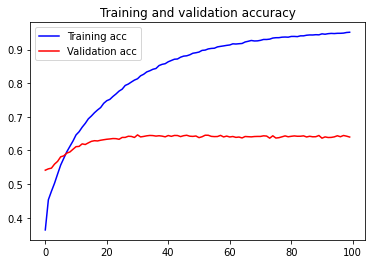

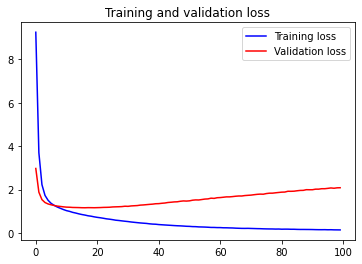

In [9]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()